In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# DNAとそれに対応するmRNAの遺伝子発現量の関係性を見る

In [6]:
data_table=pd.read_csv('./dataset/elegant-scipy/data/counts.txt.bz2',index_col=0)

## サンプルに含まれる遺伝子ごとの発現量を取得

In [8]:
# index: 遺伝子名 col:サンプル名
data_table.head()

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00


In [12]:
data_table.shape

(20500, 375)

In [10]:
# 遺伝子の長さの情報
gene_info=pd.read_csv('./dataset/elegant-scipy/data/genes.csv',index_col=0)

In [11]:
gene_info.head()

,GeneID,GeneLength
GeneSymbol,,
CPA1,1357,1724
GUCY2D,3000,3623
UBC,7316,2687
C11orf95,65998,5581
ANKMY2,57037,2611


In [13]:
gene_info.shape

(20503, 2)

サンプルの遺伝子がすべてgene_infoに含まれるか確認

In [14]:
# ２つのindexの集合の積を取る
matched_index=pd.Index.intersection(data_table.index,gene_info.index)

In [17]:
count=np.asarray(data_table.loc[matched_index])

In [19]:
gene_names=np.array(matched_index)

In [21]:
print(f'meta情報があるgeneは{data_table.shape[0]}のうち、{count.shape[0]}')

meta情報があるgeneは20500のうち、20500


# 遺伝子発現量の分布をKDEで可視化

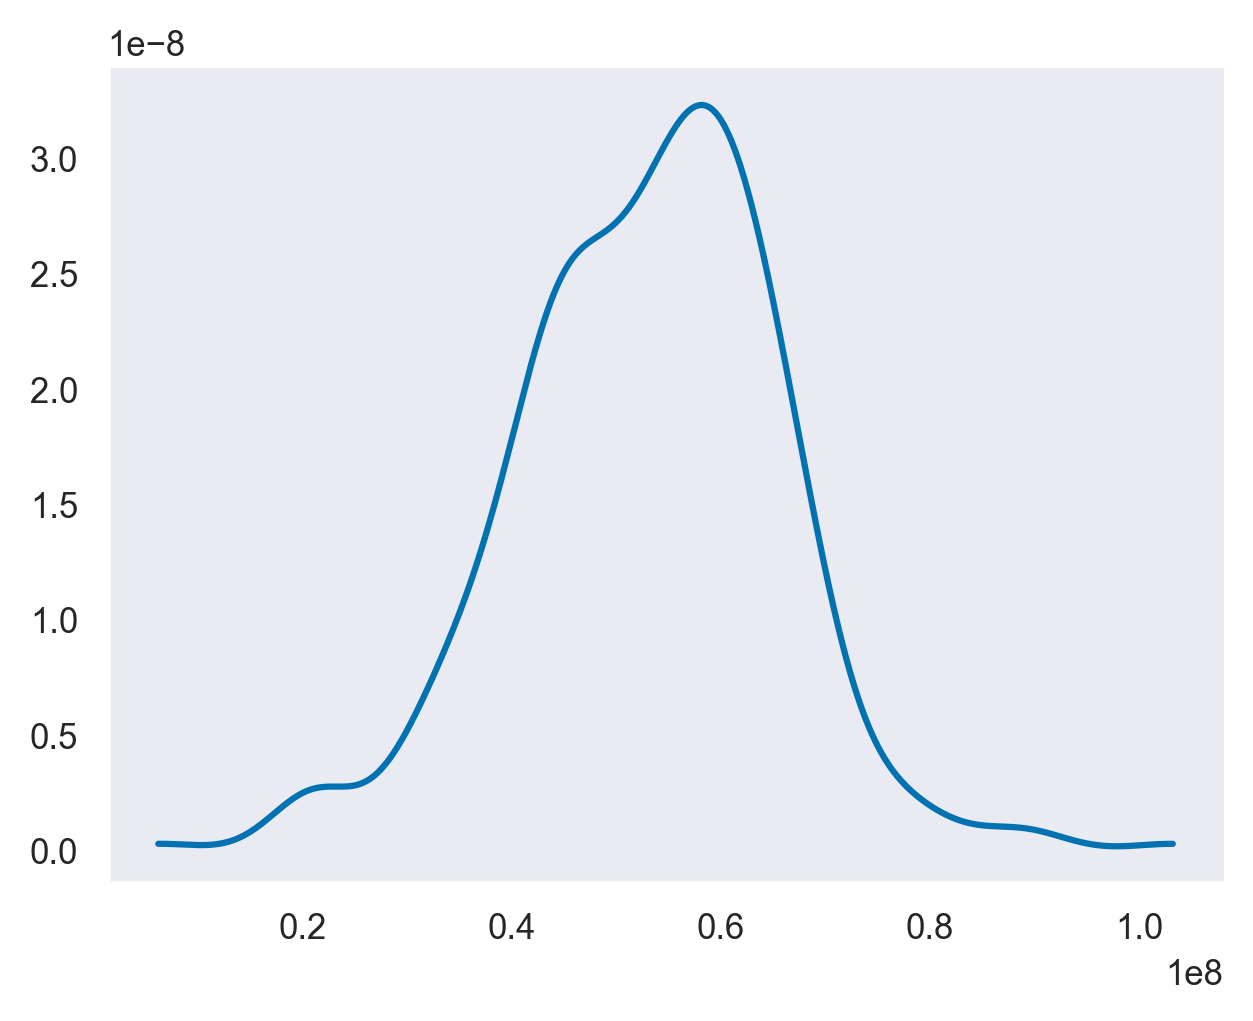

In [155]:
from scipy import  stats

# サンプルごとの合計の発現量
total_counts=data_table.sum(axis=0)
dens=stats.kde.gaussian_kde(total_counts)
x=np.arange(min(total_counts),max(total_counts),10000)
fig,ax=plt.subplots()

ax.plot(x,dens(x))
# ax.hist(total_counts)
# snsを使えば一発
# sns.distplot(ax=ax,a=total_counts)

# データの規格化をおこなう

適当にサンプリングして、どのような規格化が妥当かを検証

In [52]:
np.random.seed(seed=8)

# 70個を適当にサンプリング
samp_index=np.random.choice(range(count.shape[1]),size=70,replace=False)
sub_counts=count[:,samp_index]



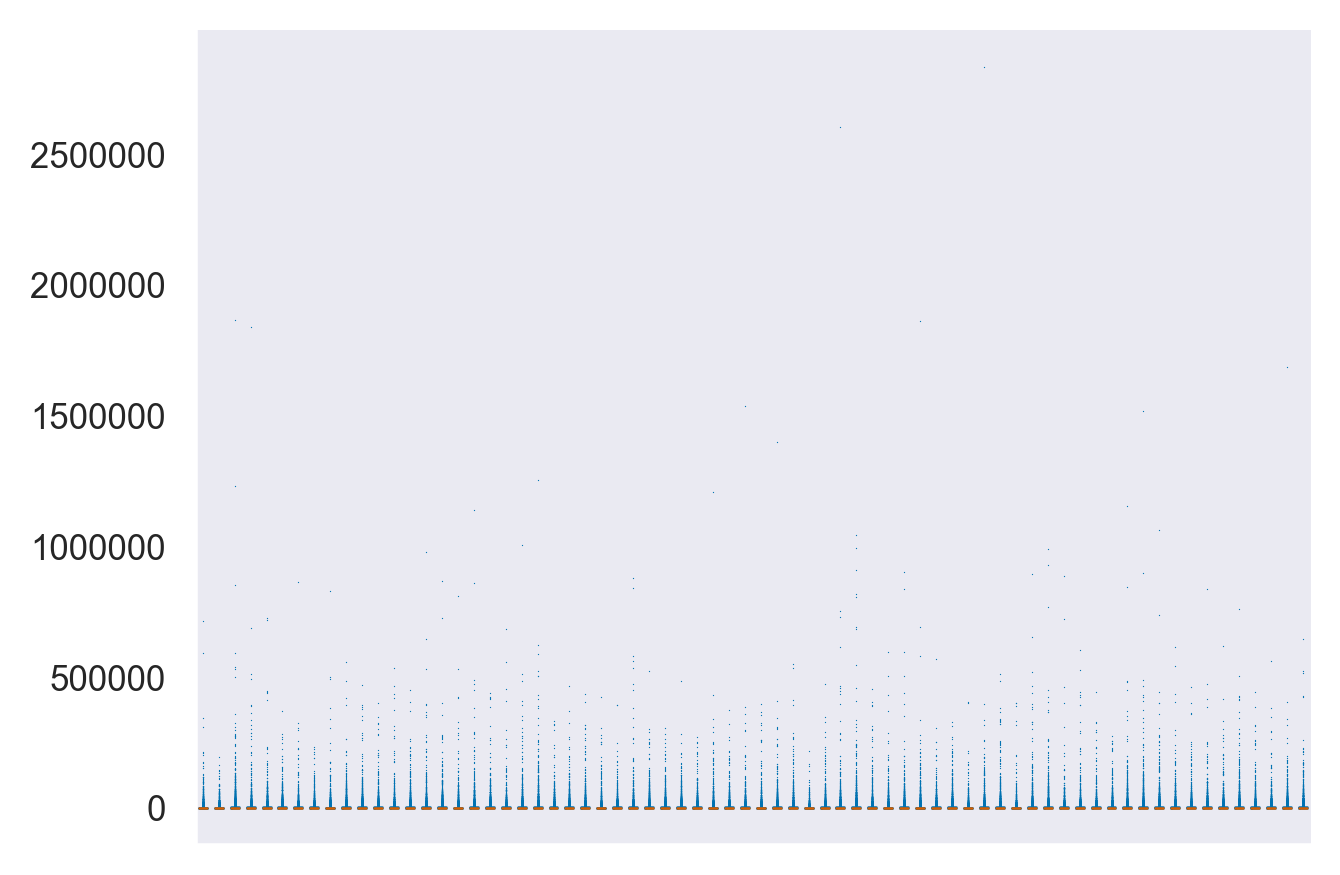

In [91]:
fig,ax=plt.subplots()
plt.style.use('dataset/elegant-scipy/style/elegant.mplstyle')
with plt.style.context('dataset/elegant-scipy/style/thinner.mplstyle'):
    ax.boxplot(sub_counts)
    
    reduce_xaxis_labels(ax,5)

In [96]:
# x_labelが見づらすぎるので、適度に間引く
def reduce_xaxis_labels(ax,factor):
    # 一旦全部消す
    plt.setp(ax.xaxis.get_ticklabels(),visible=False)
   
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)
    

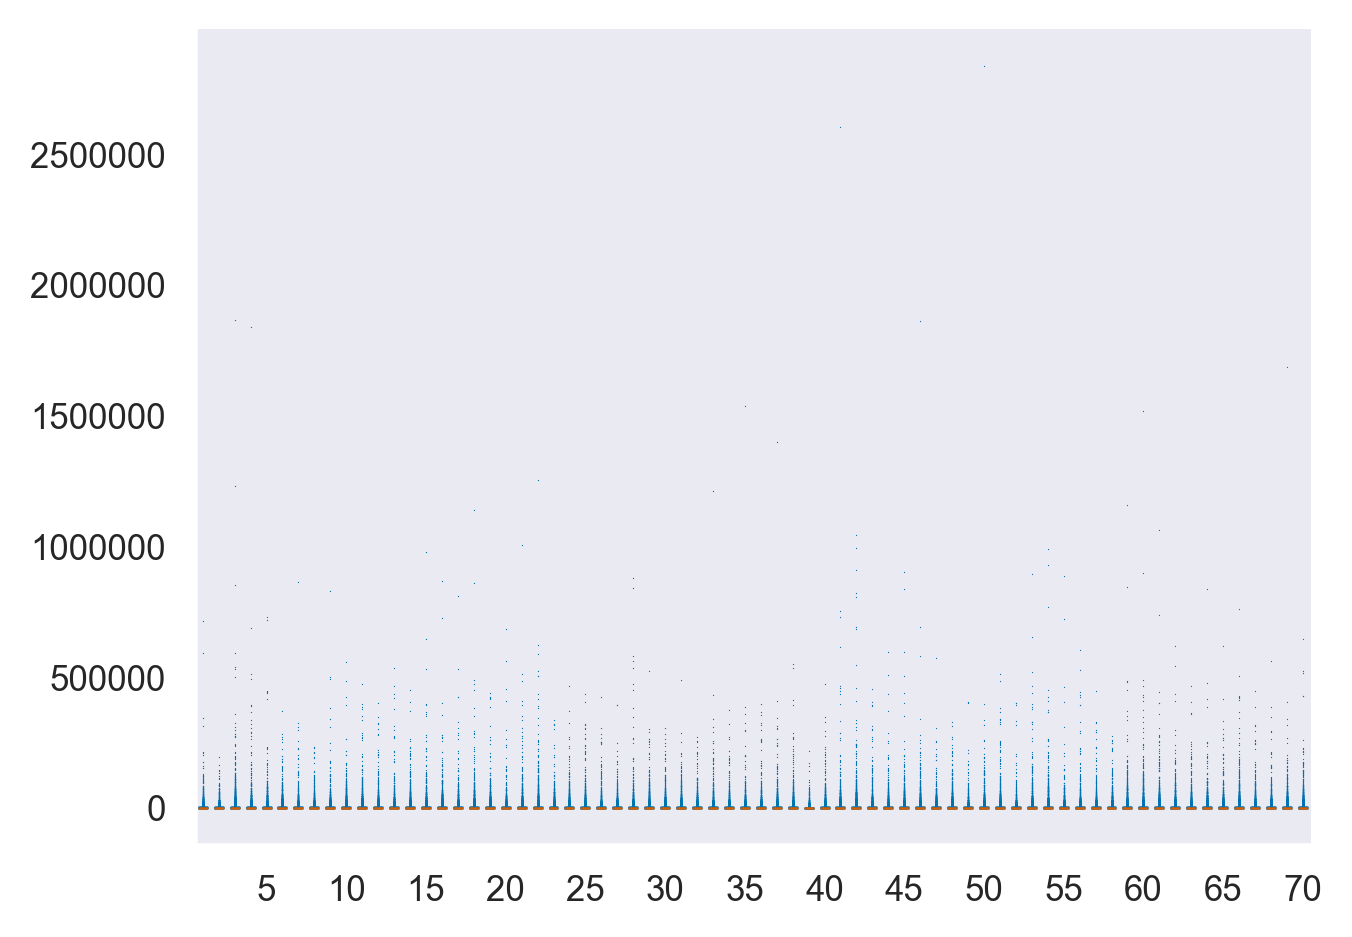

In [97]:
fig,ax=plt.subplots()
with plt.style.context('dataset/elegant-scipy/style/thinner.mplstyle'):
    ax.boxplot(sub_counts)
    reduce_xaxis_labels(ax,5)

めちゃくちゃ外れ値が多い

## logに値を変換

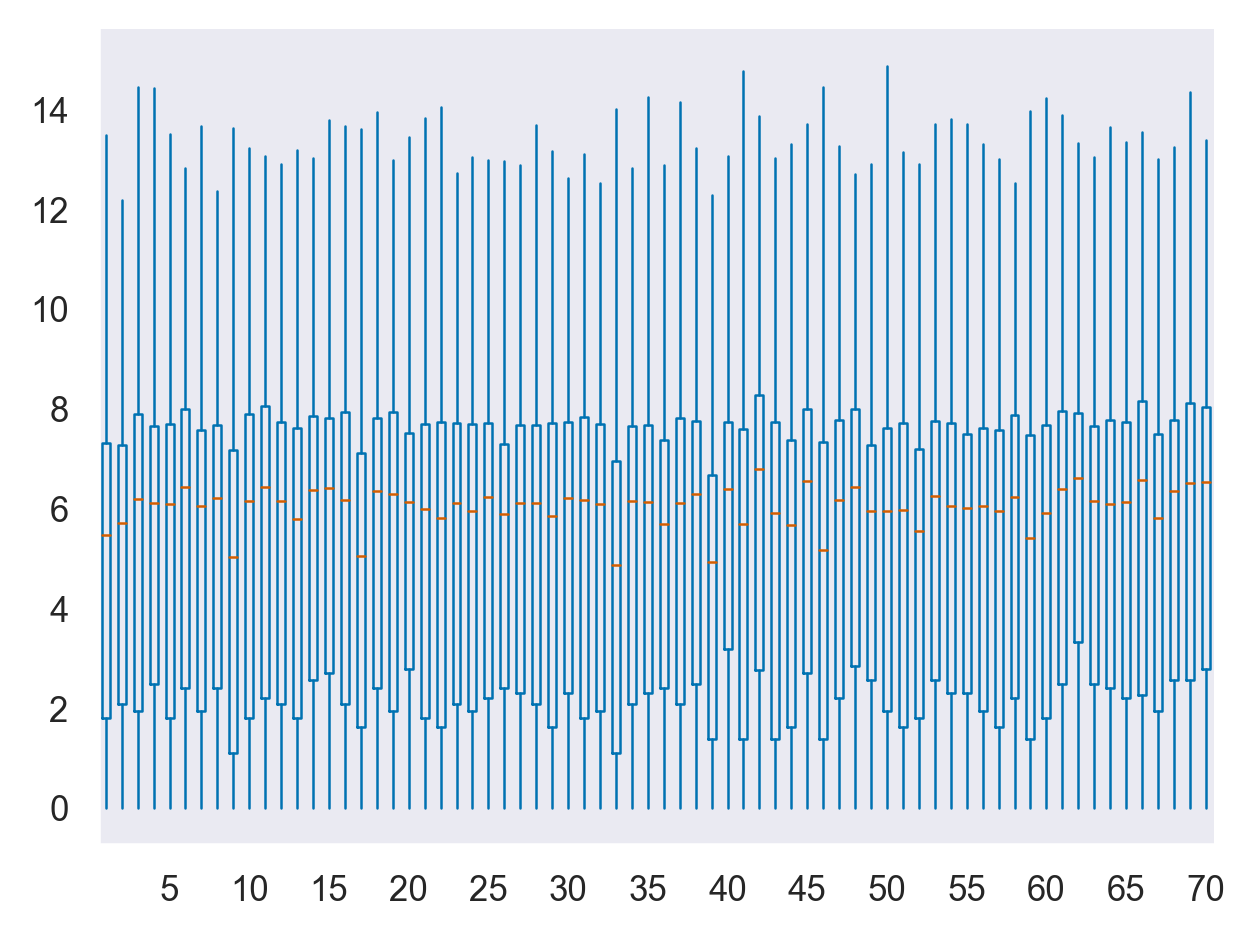

In [100]:
fig,ax=plt.subplots()
with plt.style.context('dataset/elegant-scipy/style/thinner.mplstyle'):
    ax.boxplot(np.log(sub_counts+1))
    reduce_xaxis_labels(ax,5)

値の外れ値がなくなった

## 遺伝子の長さが長いほうが遺伝子発現量も多いのではないか

In [140]:
log_count=np.log(count+1)
mean_log_count=np.mean(log_count,axis=1)

gene_length= np.asarray(gene_info.loc[matched_index]['GeneLength'])
log_gene_length=np.log(gene_length)



Text(0,0.5,'log_scale ave log counts')

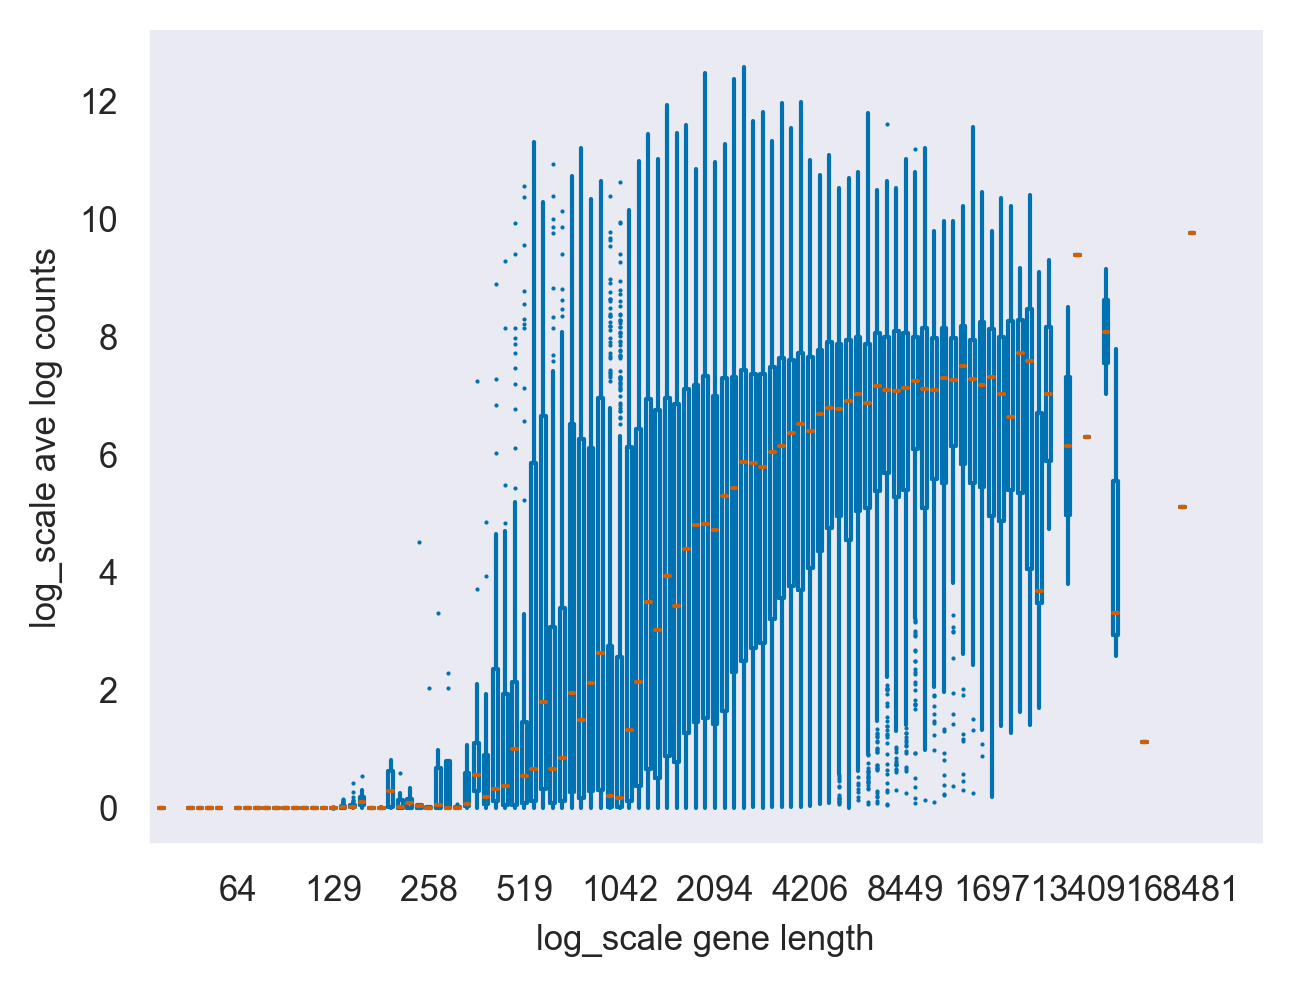

In [182]:
# ヒストグラムに変換
x_hist,x_bins=np.histogram(log_gene_length,bins='auto')

# どのbinに含まれるかを判定
x_bin_idx=np.digitize(log_gene_length,x_bins[:-1])

# binの範囲に含まれるgene lengthを取得
binned_ml_count=[mean_log_count[x_bin_idx==i] for i in range(np.max(x_bin_idx))]

fig,ax=plt.subplots()

x_bin_centers=(x_bins[1:]+x_bins[:-1])/2
x_ticklabels=np.round(np.exp(x_bin_centers)).astype(int)

# binごとにbox plot　を行う
_=ax.boxplot(binned_ml_count,labels=x_ticklabels)
reduce_xaxis_labels(ax,10)
ax.set_xlabel('log_scale gene length')
ax.set_ylabel('log_scale ave log counts')

やはり、長い遺伝子のほうが遺伝子発現量は多くなる